generation des images


In [ ]:
#!pip install tesseract
#!pip install pytesseract
#!pip install faker
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPImage, display
import random
from faker import Faker

for i in range(50):
    # Ouvrir l'image
    image = Image.open('image2.jpg')

    # Create an ImageDraw object to draw text on the image
    draw = ImageDraw.Draw(image)

    # Specify the font and text size
    font = ImageFont.truetype('arial.ttf', 20)
    font_num = ImageFont.load_default()
    # Couleur du texte (R, G, B)
    couleur = (0, 0, 0)

    fake = Faker()

    # Generate fake personal information
    id_number = str(random.randint(10**13, 10**14 - 1))
    name = fake.name()
    address = fake.address()
    date_of_birth = fake.date_of_birth(minimum_age=18, maximum_age=70)
    date_of_birth_str = date_of_birth.strftime("%Y-%m-%d")
    gender = random.choice(["M", "F"])
    eye_color = random.choice(["Hazel", "Brown", "Blue", "Green", "Yellow"])
    height = f"{random.randint(150, 200)}"
    expiration_date = fake.future_date(end_date="+10y")
    expiration_date_str = expiration_date.strftime("%Y-%m-%d")

    # Draw text on image
    draw.text((310, 68), id_number, fill=couleur, font=font)
    draw.text((185, 110), name, fill=couleur, font=font)
    draw.text((185, 170), address, fill=couleur, font=font)
    draw.text((260, 225), date_of_birth_str, fill=couleur, font=font)
    draw.text((340, 270), gender, fill=couleur, font=font)
    draw.text((185, 270), eye_color, fill=couleur, font=font)
    draw.text((260, 270), height, fill=couleur, font=font)
    draw.text((250, 290), expiration_date_str, fill=couleur, font=font)

    # Save edited image
    image.save('images/image_' + (str(i)) + '.jpg')

# Show edited image in notebook
# display(IPImage('image_modifiee.jpg'))

In [1]:
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# copy the dataset and the annotations file to the profile folder
!cp -r  /content/drive/MyDrive/profil/* /content/sample_data/profil

In [15]:
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 112.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 107.7 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=a784c4a8512aa374e3ccd1c5a2c2aa6a84840a55f844cdab2cc540d76925d55b
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-jl7preup/detectron2_f2acaf875050498bb43a42eebc500c26
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-instal

In [5]:
from pycocotools.coco import COCO

In [6]:
import requests
#import layoutparser as lp
import numpy as np

In [7]:
!git clone https://github.com/Layout-Parser/layout-model-training.git

Cloning into 'layout-model-training'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 29.50 KiB | 14.75 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [ ]:
def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List):
            a list of coco annotaions for the current image
        coco (`optional`, defaults to `False`):
            COCO annotation object instance. If set, this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()

    for ele in annotations:

        x, y, w, h = ele['bbox']

        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )

    return layout

In [8]:
COCO_ANNO_PATH = '/content/sample_data/profil/result.json'
COCO_IMG_PATH  = '/content/sample_data/profil/images'
coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [17]:
# split data into training and testing data
!pip install funcy
!python /content/sample_data/layout-model-training/utils/cocosplit.py --annotation-path     /content/sample_data/profil/result.json  --split-ratio  0.85  --train  /content/sample_data/profil/train.json --test  /content/sample_data/profil/test.json

Saved 85 entries in /content/sample_data/profil/train.json and 15 in /content/sample_data/profil/test.json


In [18]:
!bash /content/sample_data/layout-model-training/scripts/train_prima.sh

Start running the conversion script
Loading the information from the path /content/sample_data/profil/
Saving the annotation to /content/sample_data/profil/result.json
0it [00:00, ?it/s]
Traceback (most recent call last):
  File "/content/sample_data/layout-model-training/tools/convert_prima_to_coco.py", line 219, in <module>
    cocosplit.main(
  File "/content/sample_data/layout-model-training/tools/../utils/cocosplit.py", line 65, in main
    tr_ann, ts_ann = train_test_split(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py", line 2562, in train_test_split
    n_train, n_test = _validate_shuffle_split(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py", line 2236, in _validate_shuffle_split
    raise ValueError(
ValueError: With n_samples=0, test_size=None and train_size=0.8, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Command Line Args: Namespace(config_file='../configs/prima/f

In [22]:
from google.colab import drive
drive.mount('/content/drive')
import shutil

source_folder = '/content/sample_data/layout-model-training'  # Replace with your source folder path
destination_folder = '/content/drive/MyDrive/layout-model-training'  # Replace with your destination path in Google Drive

shutil.copytree(source_folder, destination_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/layout-model-training'

In [23]:
!pip install TesseractAgent
!pip install layoutparser
!pip install "layoutparser[ocr]"
!pip install pytesseract
!pip install tesseract
!sudo apt-get update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562550 sha256=c4278c42a367e4949861833e9b58d2e29abde10e0cff2e2d333873e9157aa76b
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit

In [24]:
import layoutparser as lp
import pytesseract
!apt-get install poppler-utils
#!pip install --ignore-installed Pillow==9.0.0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (363 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121062 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.2_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.2) ...
Setting up poppler-utils (22.02.0-2ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


In [54]:
model = lp.Detectron2LayoutModel(
    config_path = "/content/sample_data/layout-model-training/outputs/prima/mask_rcnn_R_50_FPN_3x/config.yaml",
    model_path = "/content/sample_data/layout-model-training/outputs/prima/mask_rcnn_R_50_FPN_3x/model_final.pth",
    extra_config = ["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.80] # <-- Only output high accuracy preds
)

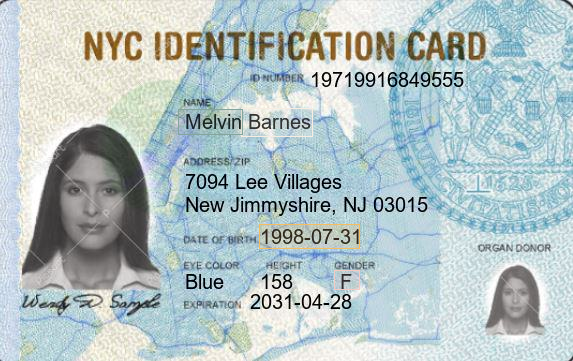

In [59]:
import cv2
# Load the image using OpenCV
image = cv2.imread('/content/sample_data/image_test0.jpg')
layout_result = model.detect(image)
lp.draw_box(image, layout_result,  box_width=1, box_alpha=0.2)

In [60]:
from PIL import Image
import pytesseract
import layoutparser as lp

# load the image
im = Image.open("/content/sample_data/image_test0.jpg")
image = cv2.imread('/content/sample_data/image_test0.jpg')

# Replace "model.detect(image)" with the model or blocks already predicted
# For this example, we will use dummy blocks.
layout_result = model.detect(image)

# Initialize a list to store extracted text
extracted_text = []

# Browse blocks predicted by the model
for i, block in enumerate(layout_result):
    # Get block coordinates
    x1, y1, x2, y2 = block.coordinates

    # Extract the region of the image corresponding to the block
    block_image = im.crop((x1, y1, x2, y2))
    block_image = block_image.convert('L')

    # Use Tesseract OCR to extract text from block
    text = pytesseract.image_to_string(block_image, lang='eng', config='--psm 10')

    # Add the extracted text to the list
    extracted_text.append(text)

    # Print the text extracted from each block
    print(f"Text from Block {i + 1}:\n{text}\n")



Text from Block 1:
Barnes


Text from Block 2:
Melvin


Text from Block 3:
1998-07-31


Text from Block 4:
-F




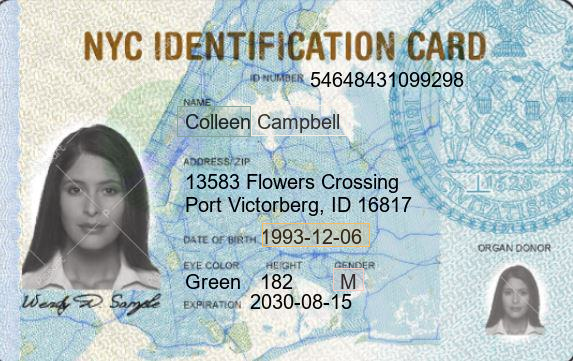

In [61]:
import cv2
# Load the image using OpenCV
image = cv2.imread('/content/sample_data/image_test1.jpg')
layout_result = model.detect(image)
lp.draw_box(image, layout_result,  box_width=1, box_alpha=0.2)

In [62]:
from PIL import Image
import pytesseract
import layoutparser as lp

# load the image 
im = Image.open("/content/sample_data/image_test1.jpg")
image = cv2.imread('/content/sample_data/image_test1.jpg')

# Replace "model.detect(image)" with the model or blocks already predicted
# For this example, we will use dummy blocks.
layout_result = model.detect(image)

# Initialize a list to store extracted text
extracted_text = []

# Browse blocks predicted by the model
for i, block in enumerate(layout_result):
    # Get block coordinates
    x1, y1, x2, y2 = block.coordinates

    # Extract the region of the image corresponding to the block
    block_image = im.crop((x1, y1, x2, y2))
    block_image = block_image.convert('L')

    # Use Tesseract OCR to extract text from block
    text = pytesseract.image_to_string(block_image, lang='eng', config='--psm 10')

    # Add the extracted text to the list
    extracted_text.append(text)

    # Print the text extracted from each block
    print(f"Text from Block {i + 1}:\n{text}\n")


Text from Block 1:
Campbell


Text from Block 2:
1993-12-06


Text from Block 3:
Colleen


Text from Block 4:
M




################################################################
